In [1]:
import sys
# add lib packages to project
lib_dir_path = '../'
if not (lib_dir_path in sys.path):
    sys.path.append(lib_dir_path)
    
from lib import  IOU  ,Dataset_top_to_birdView ,Bkend_res50_8top
from torch.utils.data import DataLoader
import torch

import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

# check IOU function
IOU([39, 63, 203, 112], [54, 66, 198, 114]) , IOU([49, 75, 203, 200], [42, 78, 186, 126])

(0.7980093676814989, 0.3402606551602677)

In [2]:
data_list = ['../data/val/000' ]
data_generator   = Dataset_top_to_birdView( data_list ,type_='val' ,check_images =True)

  0%|          | 0/1 [00:00<?, ?it/s]

creating a pandas file from val images and their annotations...


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


Validating val images pathes ...
number of removed labels:  0


In [3]:
len(data_generator)

3835

In [4]:
num_workers =40
val_batch   =200
data_loader   = DataLoader(data_generator, batch_size = val_batch   ,num_workers = num_workers, shuffle=False)

In [52]:
dataiter = iter(data_loader)
label_front, crop_front ,label_top, meta_data = dataiter.next()
print('top labels are: \n\n',label_top)

top labels are: 

 tensor([[0.5860, 0.2720, 0.6870, 0.6890],
        [0.5860, 0.2820, 0.6850, 0.6970],
        [0.5850, 0.2940, 0.6830, 0.7050],
        [0.0100, 0.0470, 0.1580, 0.1250],
        [0.5850, 0.3180, 0.6830, 0.7300],
        [0.0300, 0.1060, 0.1720, 0.2100],
        [0.5830, 0.3450, 0.6820, 0.7580],
        [0.0110, 0.0250, 0.1870, 0.2900],
        [0.5820, 0.3760, 0.6820, 0.7920],
        [0.0770, 0.1590, 0.2270, 0.3730],
        [0.5800, 0.4050, 0.6820, 0.8220],
        [0.1040, 0.2360, 0.2460, 0.4620],
        [0.5790, 0.4360, 0.6810, 0.8530],
        [0.1270, 0.3160, 0.2570, 0.5540],
        [0.5780, 0.4650, 0.6810, 0.8830],
        [0.1480, 0.4040, 0.2640, 0.6500],
        [0.5770, 0.4940, 0.6810, 0.9140],
        [0.1660, 0.5070, 0.2690, 0.7540],
        [0.4480, 0.0330, 0.4850, 0.1200],
        [0.4370, 0.0910, 0.4780, 0.1650],
        [0.4280, 0.0310, 0.5230, 0.2140],
        [0.4190, 0.0090, 0.5090, 0.2660],
        [0.4110, 0.0810, 0.4940, 0.3320],
        [0.4040

In [6]:
# load model
load_model_ = True
loaded_weights = '../runs/experiment_1_epoch_0_to_100_batch_64_lr_0.001/saved_models/model_E099_Loss0.003897.pt'
loaded_weights = '../runs/experiment_2_epoch_100_to_150_batch_64_lr_0.0005/saved_models/model_E144_Loss0.003723.pt'
model = Bkend_res50_8top()
if load_model_:
    state_dict = torch.load(loaded_weights)
    model.load_state_dict(state_dict)
    model.eval()
    print (f"Model is loaded.\n [from {loaded_weights}]")
    


Model is loaded.
 [from ../runs/experiment_2_epoch_100_to_150_batch_64_lr_0.0005/saved_models/model_E144_Loss0.003723.pt]


In [53]:
outputs = model(crop_front,label_front)
outputs

tensor([[0.6071, 0.2833, 0.7008, 0.5215],
        [0.5953, 0.3674, 0.6840, 0.6080],
        [0.5717, 0.3590, 0.6557, 0.6023],
        [0.2014, 0.4495, 0.2862, 0.6838],
        [0.5788, 0.3798, 0.6632, 0.6219],
        [0.2174, 0.4628, 0.2995, 0.6980],
        [0.5681, 0.4037, 0.6494, 0.6453],
        [0.1737, 0.4220, 0.2646, 0.6558],
        [0.5636, 0.4208, 0.6432, 0.6618],
        [0.0620, 0.1675, 0.1712, 0.3667],
        [0.5799, 0.3917, 0.6640, 0.6334],
        [0.0975, 0.1786, 0.1983, 0.3848],
        [0.5867, 0.4225, 0.6708, 0.6614],
        [0.1085, 0.3184, 0.2099, 0.5438],
        [0.5646, 0.4693, 0.6413, 0.7065],
        [0.1533, 0.4459, 0.2487, 0.6771],
        [0.5514, 0.5014, 0.6246, 0.7343],
        [0.1784, 0.4584, 0.2690, 0.6883],
        [0.4594, 0.0465, 0.5588, 0.2385],
        [0.4799, 0.0579, 0.5774, 0.2548],
        [0.4150, 0.0475, 0.5109, 0.2422],
        [0.4155, 0.0517, 0.5090, 0.2503],
        [0.3927, 0.0688, 0.4785, 0.2745],
        [0.3943, 0.1000, 0.4740, 0

In [54]:

tops = zip( (outputs.detach().numpy().tolist()),(label_top.numpy()).tolist())
Iou_list =[]

for itm in tops:
    Iou_list.append(IOU(*(itm)))

Iou_list

[0.8477858419726303,
 0.8684743988532225,
 0.8501341141937548,
 0.33476373002326615,
 0.8594960520353626,
 0.3785955219255257,
 0.8425408989608377,
 0.4501215534757547,
 0.833361870612368,
 0.9278711064898151,
 0.8448896700808132,
 0.8547474533728184,
 0.8428653176903268,
 0.933536408519702,
 0.832310078120252,
 0.9286423170512803,
 0.8076206258806358,
 0.9019315277435077,
 0.823644842879797,
 0.7883542204623378,
 0.9415854243220232,
 0.9505990690114228,
 0.9166498232562771,
 0.882849726870977,
 0.8598891738695204,
 0.8401152159001272,
 0.9469692766279387,
 0.8811309277688224,
 0.8895238647208408,
 0.8558813291613652,
 0.9373693858287321,
 0.8818025858458358,
 0.8910098810242588,
 0.9410127897445709,
 0.7507806071781927,
 0.727766253392602,
 0.8486698814855984,
 0.9202544270439952,
 0.8984660570194481,
 0.8976317984220656,
 0.9264922090291844,
 0.8323439573237318,
 0.7521783013447984,
 0.7276888350384103,
 0.7978888954275176,
 0.8264470848412648,
 0.8647137859930433,
 0.843116080453690

In [9]:
# label_front.detach().numpy().tolist()

In [64]:
# jj= pd.DataFrame()
jj= jj.append( pd.DataFrame(meta_data))
jj

,frame_f,frame_b,bbox_id,bbox_model,bbox_dist,bbox_yaw,img_path,iou,label_top,label_top_pre,label_front
0,000001.jpg,000001_b.jpg,000396813,000904750859,13.150,358.465,../data/val/000,0.847786,"[0.5860000252723694, 0.2720000147819519, 0.686...","[0.6070971488952637, 0.2833010256290436, 0.700...","[0.5709999799728394, 0.3409999907016754, 0.75,..."
1,000002.jpg,000002_b.jpg,000396813,000904750859,12.715,358.784,../data/val/000,0.868474,"[0.5860000252723694, 0.28200000524520874, 0.68...","[0.5953385233879089, 0.36742761731147766, 0.68...","[0.5730000138282776, 0.3230000138282776, 0.765..."
2,000003.jpg,000003_b.jpg,000396813,000904750859,12.228,359.279,../data/val/000,0.850134,"[0.5849999785423279, 0.2939999997615814, 0.683...","[0.5716622471809387, 0.3590429127216339, 0.655...","[0.5740000009536743, 0.3149999976158142, 0.781..."
3,000003.jpg,000003_b.jpg,000516875,000886934177,28.152,257.177,../data/val/000,0.334764,"[0.009999999776482582, 0.04699999839067459, 0....","[0.20139101147651672, 0.4494722783565521, 0.28...","[0.23199999332427979, 0.3569999933242798, 0.31..."
4,000004.jpg,000004_b.jpg,000396813,000904750859,11.862,359.943,../data/val/000,0.859496,"[0.5849999785423279, 0.3179999887943268, 0.683...","[0.5787530541419983, 0.37977835536003113, 0.66...","[0.5740000009536743, 0.3070000112056732, 0.800..."
...,...,...,...,...,...,...,...,...,...,...,...
195,000358.jpg,000358_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.901396,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47566282749176025, 0.41934192180633545, 0.5...","[0.4740000069141388, 0.5040000081062317, 0.555..."
196,000359.jpg,000359_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.932182,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47496622800827026, 0.3973918557167053, 0.53...","[0.4740000069141388, 0.5040000081062317, 0.555..."
197,000360.jpg,000360_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.925157,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47853195667266846, 0.4021313786506653, 0.54...","[0.4740000069141388, 0.5040000081062317, 0.555..."
198,000361.jpg,000361_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.915674,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.4783588945865631, 0.4089033901691437, 0.542...","[0.4740000069141388, 0.5040000081062317, 0.555..."


In [68]:
import pandas as pd



def eval_mAp(meta_data ,label_top, label_front, outputs ,iou_th = 0.75):


    

    meta_data = pd.DataFrame(meta_data)
    
    ## Ap calculation
    total_objects = len(meta_data)
    meta_data['P_estimate'] = meta_data.apply(lambda row: True if(row.iou > 0.5) else False   ,axis=1)
    meta_data['TP']  = (meta_data['P_estimate'] == True).cumsum()
    meta_data['precision'] = meta_data.apply(lambda row: row.TP/(row.name+1)  ,axis=1)
    meta_data['recall'] = meta_data.apply(lambda row: row.TP/(total_objects)  ,axis=1)
    # Interpolated Precision
    meta_data['precision_IP'] = meta_data.groupby('recall')['precision'].transform(max)
    
    prec_at_rec=[]
    recall_level = np.linspace(0,1,11)
    for rl in recall_level:
        try:
            x = meta_data[meta_data['recall'] > rl]['precision_IP']
            prec = max(x)
        except:
            prec = 0

        prec_at_rec.append(prec)
    avg_prec = np.mean(prec_at_rec)
    print('11 point precision is ', prec_at_rec)
    print('mAP is ', avg_prec)
    
    

In [75]:

Meta_Data = pd.DataFrame()



In [78]:
def update_meta_data(meta_data,label_top, label_front, outputs ):
    global Meta_Data
    
    tops = zip( (outputs.detach().numpy().tolist()),(label_top.numpy()).tolist())
    Iou_list =[]

    for itm in tops:
        Iou_list.append(IOU(*(itm)))

    temp = pd.DataFrame()
    meta_data.update({'iou':Iou_list})
    meta_data.update({'label_top'    :label_top.detach().numpy().tolist()})
    meta_data.update({'label_top_pre':outputs.detach().numpy().tolist()})
    meta_data.update({'label_front' :label_front.detach().numpy().tolist()})
    Meta_Data = Meta_Data.append(pd.DataFrame(meta_data))

update_meta_data(meta_data,label_top, label_front, outputs )
Meta_Data

,frame_f,frame_b,bbox_id,bbox_model,bbox_dist,bbox_yaw,img_path,iou,label_top,label_top_pre,label_front
0,000001.jpg,000001_b.jpg,000396813,000904750859,13.150,358.465,../data/val/000,0.847786,"[0.5860000252723694, 0.2720000147819519, 0.686...","[0.6070971488952637, 0.2833010256290436, 0.700...","[0.5709999799728394, 0.3409999907016754, 0.75,..."
1,000002.jpg,000002_b.jpg,000396813,000904750859,12.715,358.784,../data/val/000,0.868474,"[0.5860000252723694, 0.28200000524520874, 0.68...","[0.5953385233879089, 0.36742761731147766, 0.68...","[0.5730000138282776, 0.3230000138282776, 0.765..."
2,000003.jpg,000003_b.jpg,000396813,000904750859,12.228,359.279,../data/val/000,0.850134,"[0.5849999785423279, 0.2939999997615814, 0.683...","[0.5716622471809387, 0.3590429127216339, 0.655...","[0.5740000009536743, 0.3149999976158142, 0.781..."
3,000003.jpg,000003_b.jpg,000516875,000886934177,28.152,257.177,../data/val/000,0.334764,"[0.009999999776482582, 0.04699999839067459, 0....","[0.20139101147651672, 0.4494722783565521, 0.28...","[0.23199999332427979, 0.3569999933242798, 0.31..."
4,000004.jpg,000004_b.jpg,000396813,000904750859,11.862,359.943,../data/val/000,0.859496,"[0.5849999785423279, 0.3179999887943268, 0.683...","[0.5787530541419983, 0.37977835536003113, 0.66...","[0.5740000009536743, 0.3070000112056732, 0.800..."
...,...,...,...,...,...,...,...,...,...,...,...
195,000358.jpg,000358_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.901396,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47566282749176025, 0.41934192180633545, 0.5...","[0.4740000069141388, 0.5040000081062317, 0.555..."
196,000359.jpg,000359_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.932182,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47496622800827026, 0.3973918557167053, 0.53...","[0.4740000069141388, 0.5040000081062317, 0.555..."
197,000360.jpg,000360_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.925157,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47853195667266846, 0.4021313786506653, 0.54...","[0.4740000069141388, 0.5040000081062317, 0.555..."
198,000361.jpg,000361_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.915674,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.4783588945865631, 0.4089033901691437, 0.542...","[0.4740000069141388, 0.5040000081062317, 0.555..."


In [56]:

meta_data.update({'iou':Iou_list})
meta_data.update({'label_top'    :label_top.detach().numpy().tolist()})
meta_data.update({'label_top_pre':outputs.detach().numpy().tolist()})
meta_data.update({'label_front' :label_front.detach().numpy().tolist()})

# meta_data = pd.DataFrame(meta_data)
# meta_data

In [29]:
# for row  in meta_data.iterrows():
#     row= row[1]
#     if row.iou > 0.5:
#         row['estimate'] = True
#     else:
#         row['estimate'] = False

# TP_ = 0

# def precision_calc(row):
# #     TP_ = row.P_estimate ==True ? TP_ : TP_+1;
#     TP_ = [TP_ , TP_+1][row.P_estimate ==True]
#     return TP_
        

# TP_ = 0  

total_objects = len(meta_data)

iou_th = 0.75
            
meta_data['P_estimate'] = meta_data.apply(lambda row: True if(row.iou > iou_th) else False   ,axis=1)
meta_data['TP']  = (meta_data['P_estimate'] == True).cumsum()
meta_data['precision'] = meta_data.apply(lambda row: row.TP/(row.name+1)  ,axis=1)
meta_data['recall'] = meta_data.apply(lambda row: row.TP/(total_objects)  ,axis=1)
# meta_data['precition']  = meta_data.apply(precision_calc   ,axis=1) 
meta_data

,frame_f,frame_b,bbox_id,bbox_model,bbox_dist,bbox_yaw,img_path,iou,label_top,label_top_pre,label_front,P_estimate,TP,precision,recall,precision_IP
0,000001.jpg,000001_b.jpg,000396813,000904750859,13.150,358.465,../data/val/000,0.847786,"[0.5860000252723694, 0.2720000147819519, 0.686...","[0.6070971488952637, 0.2833010256290436, 0.700...","[0.5709999799728394, 0.3409999907016754, 0.75,...",True,1,1.000000,0.005,0.000000
1,000002.jpg,000002_b.jpg,000396813,000904750859,12.715,358.784,../data/val/000,0.868474,"[0.5860000252723694, 0.28200000524520874, 0.68...","[0.5953385233879089, 0.36742761731147766, 0.68...","[0.5730000138282776, 0.3230000138282776, 0.765...",True,2,1.000000,0.010,0.000000
2,000003.jpg,000003_b.jpg,000396813,000904750859,12.228,359.279,../data/val/000,0.850134,"[0.5849999785423279, 0.2939999997615814, 0.683...","[0.5716622471809387, 0.3590429127216339, 0.655...","[0.5740000009536743, 0.3149999976158142, 0.781...",True,3,1.000000,0.015,0.000000
3,000003.jpg,000003_b.jpg,000516875,000886934177,28.152,257.177,../data/val/000,0.334764,"[0.009999999776482582, 0.04699999839067459, 0....","[0.20139101147651672, 0.4494722783565521, 0.28...","[0.23199999332427979, 0.3569999933242798, 0.31...",False,3,0.750000,0.015,0.000000
4,000004.jpg,000004_b.jpg,000396813,000904750859,11.862,359.943,../data/val/000,0.859496,"[0.5849999785423279, 0.3179999887943268, 0.683...","[0.5787530541419983, 0.37977835536003113, 0.66...","[0.5740000009536743, 0.3070000112056732, 0.800...",True,4,0.800000,0.020,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,000358.jpg,000358_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.901396,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47566282749176025, 0.41934192180633545, 0.5...","[0.4740000069141388, 0.5040000081062317, 0.555...",True,177,0.903061,0.885,0.382653
196,000359.jpg,000359_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.932182,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47496622800827026, 0.3973918557167053, 0.53...","[0.4740000069141388, 0.5040000081062317, 0.555...",True,178,0.903553,0.890,0.385787
197,000360.jpg,000360_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.925157,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.47853195667266846, 0.4021313786506653, 0.54...","[0.4740000069141388, 0.5040000081062317, 0.555...",True,179,0.904040,0.895,0.388889
198,000361.jpg,000361_b.jpg,000517901,002391954683,9.284,1.072,../data/val/000,0.915674,"[0.48399999737739563, 0.375, 0.532000005245208...","[0.4783588945865631, 0.4089033901691437, 0.542...","[0.4740000069141388, 0.5040000081062317, 0.555...",True,180,0.904523,0.900,0.391960


(0, 1)

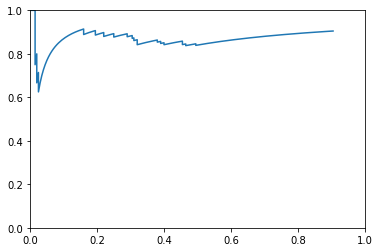

In [30]:
# zip(meta_data[precition].tolistist())
# pr=zip(meta_data['precision'].tolist() ,meta_data['recall'].tolist())
plt.plot(meta_data['recall'].tolist() ,meta_data['precision'].tolist())
# plt.plot(meta_data['precition'].tolist() ,meta_data['recal'].tolist())
plt.xlim((0, 1)) 
plt.ylim((0, 1)) 

In [31]:
meta_data.groupby('recall')['precision'].apply(list)

recall
0.005                          [1.0]
0.010                          [1.0]
0.015                    [1.0, 0.75]
0.020      [0.8, 0.6666666666666666]
0.025    [0.7142857142857143, 0.625]
                    ...             
0.885           [0.9030612244897959]
0.890           [0.9035532994923858]
0.895           [0.9040404040404041]
0.900           [0.9045226130653267]
0.905                        [0.905]
Name: precision, Length: 181, dtype: object

In [32]:
# Interpolated Precision
meta_data['precision_IP'] = meta_data.groupby('recall')['precision'].transform(max)

(0, 1)

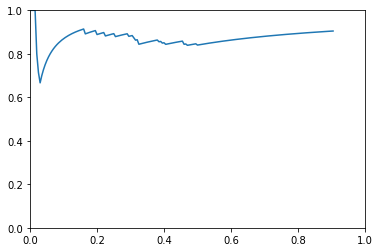

In [33]:
plt.plot(meta_data['recall'].tolist() ,meta_data['precision_IP'].tolist())
plt.xlim((0, 1)) 
plt.ylim((0, 1)) 

In [49]:
prec_at_rec=[]
recall_level = np.linspace(0,1,11)
for rl in recall_level:
    try:
        x = meta_data[meta_data['recall'] > rl]['precision_IP']
        prec = max(x)
    except:
        prec = 0
    
    prec_at_rec.append(prec)
avg_prec = np.mean(prec_at_rec)
print('11 point precision is ', prec_at_rec)
print('mAP is ', avg_prec)

11 point precision is  [1.0, 0.9142857142857143, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0]
mAP is  0.8322077922077921


In [ ]:
meta_data['precition'].plot()
meta_data['recal'].plot()

In [ ]:
meta_data.iloc[0]

In [ ]:
num=1


img_f = os.path.join( meta_data.iloc[num].img_path, 'frames', meta_data.iloc[num].frame_f)
img_b = os.path.join( meta_data.iloc[num].img_path, 'frames', meta_data.iloc[num].frame_b)

img_f = cv2.imread(img_f)
img_b = cv2.imread(img_b)

img_f.shape

In [ ]:
# shape = img_f.shape
# bbox = (np.array(meta_data.iloc[0].label_front) * [shape[1],shape[0],shape[1],shape[0]]).astype(int)
# bbox

# img_f = cv2.rectangle(img_f, tuple(bbox[0:2]), tuple(bbox[2:]), (255, 0, 0), 2)

In [ ]:
def draw_rect(img ,p , color = (255, 0, 0) ,thickness =3):
    shape = img_f.shape
    bbox = (np.array(p) * [shape[1],shape[0],shape[1],shape[0]]).astype(int)
    img = cv2.rectangle(img, tuple(bbox[0:2]), tuple(bbox[2:]),color , thickness)
    return img

def visualize_result(meta_data):
    len_ =len(meta_data)
    
    fig, axs = plt.subplots(len_,2, figsize=(15, 4*len_), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .001, wspace=.1)
    axs = axs.ravel()
    
    for i in range(0,len_):
        num=i
        
        img_f = os.path.join( meta_data.iloc[num].img_path, 'frames', meta_data.iloc[num].frame_f)
        img_b = os.path.join( meta_data.iloc[num].img_path, 'frames', meta_data.iloc[num].frame_b)

        img_f = cv2.imread(img_f)
        img_b = cv2.imread(img_b)


        draw_rect(img_f ,meta_data.iloc[num].label_front)
        draw_rect(img_b ,meta_data.iloc[num].label_top)
        draw_rect(img_b ,meta_data.iloc[num].label_top_pre , color = (0, 255, 0))
        
        axs[2*i].imshow(img_f, interpolation='bilinear', vmin=0, vmax=1)
        axs[(2*i)+1].imshow(img_b, interpolation='bilinear', vmin=0, vmax=1)
#         axs[2*i].set_title(str(i))
#         axs[(2*i)+1].set_title(str((2*i)+1))

#         plt.figure(figsize=(16, 8))
#         plt.subplot(121)
#         plt.imshow(img_f, interpolation='bilinear', vmin=0, vmax=1)
#         plt.subplot(122)
#         plt.imshow(img_b, interpolation='bilinear', vmin=0, vmax=1)
#         plt.show()

# visualize_result(meta_data)

In [ ]:
# from matplotlib import gridspec

# nrow = 5
# ncol = 3

# fig = plt.figure(figsize=(4, 10)) 

# gs = gridspec.GridSpec(nrow, ncol, width_ratios=[1, 1,1],
#          wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

# for i in range(nrow):
#     for j in range(ncol):
#         im = np.random.rand(28,28)
#         ax= plt.subplot(gs[i,j])
#         ax.imshow(im)
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])

# #plt.tight_layout() # do not use this!!
# plt.show()